# Store24: Gestión de Retención de empleados

Referencia: https://www.linkedin.com/feed/update/urn:li:activity:7175674523889868800/

### Descripción de variables


| Nombre de variable       | Descripción                                                                                          |
|--------------------------|------------------------------------------------------------------------------------------------------|
| Sales                   | Ventas del año fiscal 2000                                                                          |
| Profit                 | Utilidad del año fiscal 2000 antes de asignaciones de gastos indirectos corporativos, alquiler y depreciación |
| MTenure | Antigüedad promedio en el puesto del gerente durante el año fiscal 2000 donde la tenencia se define como el número de meses de experiencia con Store24 |
| CTenure | Antigüedad promedio en el puesto del personal durante el año fiscal 2000 donde la tenencia se define como el número de meses de experiencia con Store24 |
| Comp              | Número de competidores por 10.000 personas dentro de un radio de 1⁄2 milla                           |
| Pop                | Población dentro de un radio de 1⁄2 milla                                                            |
| Visibility              | Calificación de cinco puntos en la visibilidad de la tienda donde 5 es el puntaje más alto           |
| PedCount      | Calificación de cinco puntos en el volumen de tráfico de peatones donde 5 es el puntaje más alto    |
| Hours24                 | Indicador de si la tienda abre o no las 24 horas                                                    |
| Res              | Indicador de si está ubicada en área residencial o área industrial                                   |
| CrewSkill              | Habilidad del equipo                                   |
| MgrSkill              | Habilidad de gestión                                   |
| ServQual              | Medición de calidad del servicio                                   |


## 01. Carga e Inspección de los Datos

In [92]:
library(readxl)

# Carga de los datos
path <- '/workspaces/devcontainers-rstudio/explore-data/Store24_TIG.xls'

data <- read_excel(path, sheet = "Store24")

# Convertir los campos Visibility, PedCount, Res y Hours24 a enteros
data$store <- as.integer(data$store)
data$Visibility <- as.integer(data$Visibility)
data$PedCount <- as.integer(data$PedCount)
data$Res <- as.integer(data$Res)
data$Hours24 <- as.integer(data$Hours24)

# Muestro datos
head(data, 10)

store,Sales,Profit,MTenure,CTenure,Pop,Comp,Visibility,PedCount,Res,Hours24,CrewSkill,MgrSkill,ServQual
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1060294,265014,0.00000,24.804930,7535,2.797888,3,3,1,1,3.56,3.150000,86.84327
2,1619874,424007,86.22219,6.636550,8630,4.235555,4,3,1,1,3.20,3.556667,94.73510
3,1099921,222735,23.88854,5.026694,9695,4.494666,3,3,1,1,3.80,4.116667,78.94776
4,1053860,210122,0.00000,5.371663,2797,4.253946,4,2,1,1,2.06,4.100000,100.00000
5,1227841,300480,3.87737,6.866530,20335,1.651364,2,5,0,1,3.65,3.588889,68.42164
6,1703140,469050,149.93590,11.351130,16926,3.184613,3,4,1,0,3.58,4.605556,94.73510
7,1809256,476355,62.53080,7.326488,17754,3.377900,2,5,1,1,3.94,4.100000,81.57837
8,1378482,361115,0.00000,56.772080,20824,2.895114,4,3,1,1,3.98,3.800000,78.94776
9,2113089,474725,108.99350,6.061602,26519,2.637630,2,4,1,1,3.22,3.583333,100.00000


In [93]:
library(dplyr)
library(tidyr)

# Obtenemos datos estadisticos por cada columna 
summary_stats <- data %>%
  summarise(across(c(Sales, Profit, MTenure, CTenure, Pop, Comp, Visibility, PedCount, Res, Hours24),
                   list(mean = ~mean(.), sd = ~sd(.), min = ~min(.), max = ~max(.)),
                   .names = "{.col}_{.fn}")) %>%
  pivot_longer(cols = everything(),
               names_to = c("Variable", "Statistic"),
               names_sep = "_",
               values_to = "Value") %>%
  pivot_wider(names_from = Statistic, values_from = Value)

# Mostrar los resultados
summary_stats

Variable,mean,sd,min,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Sales,1.205413e+06,3.045313e+05,6.993060e+05,2.113089e+06
Profit,2.763136e+05,8.940408e+04,1.221800e+05,5.189980e+05
MTenure,4.529644e+01,5.767155e+01,0.000000e+00,2.779877e+02
CTenure,1.393150e+01,1.769752e+01,8.870637e-01,1.141519e+02
Pop,9.825587e+03,5.911674e+03,1.046000e+03,2.651900e+04
Comp,3.787751e+00,1.311390e+00,1.651364e+00,1.112788e+01
Visibility,3.080000e+00,7.490535e-01,2.000000e+00,5.000000e+00
PedCount,2.960000e+00,9.924036e-01,1.000000e+00,5.000000e+00
Res,9.600000e-01,1.972788e-01,0.000000e+00,1.000000e+00


### 1.1 Top 10 Tiendas con Mayor Utilidad

In [94]:
library(dplyr)

# Asumiendo que 'data' es tu dataframe y contiene las columnas 'Profit', 'MTenure', y 'CTenure'
# Para obtener las 10 tiendas más rentables
top_10_most_profitable <- data %>%
  arrange(desc(Profit)) %>%
  head(10) %>%
  select(store, Sales, Profit, MTenure, CTenure)


# Para calcular la media de 'Profit', 'MTenure', y 'CTenure' de estas 10 tiendas
mean_profit = mean(top_10_most_profitable$Profit)
mean_mtenure = mean(top_10_most_profitable$MTenure)
mean_ctenure = mean(top_10_most_profitable$CTenure)

# Mostrar los resultados
top_10_most_profitable

cat("Media de Profit: ", mean_profit, "\n")
cat("Media de MTenure: ", mean_mtenure, "\n")
cat("Media de CTenure: ", mean_ctenure, "\n")

store,Sales,Profit,MTenure,CTenure
<int>,<dbl>,<dbl>,<dbl>,<dbl>
74,1782957,518998,171.09720,29.519510
7,1809256,476355,62.53080,7.326488
9,2113089,474725,108.99350,6.061602
6,1703140,469050,149.93590,11.351130
44,1807740,439781,182.23640,114.151900
2,1619874,424007,86.22219,6.636550
45,1602362,410149,47.64565,9.166325
18,1704826,394039,239.96980,33.774130
11,1583446,389886,44.81977,2.036961


Media de Profit:  438484.3 
Media de MTenure:  110.6299 
Media de CTenure:  22.66611 


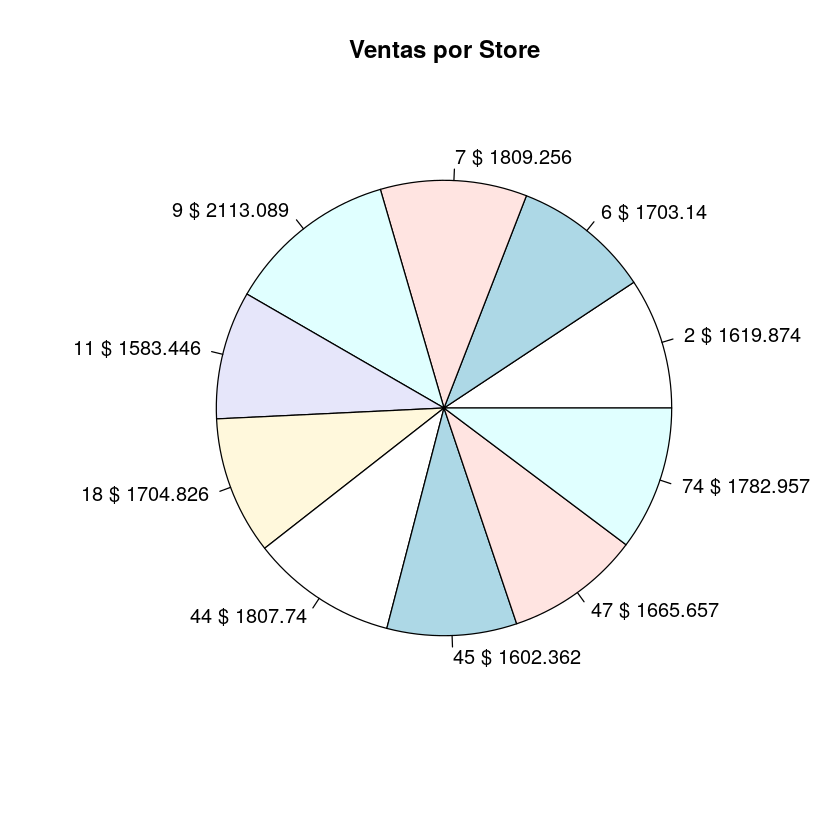

In [95]:
# Gráfico circular de las ventas por store
sales_by_store <- top_10_most_profitable %>%
    group_by(store) %>%
    summarise(total_sales = sum(Sales))

# Convertir el monto a miles
sales_by_store$total_sales <- sales_by_store$total_sales / 1000

pie(sales_by_store$total_sales, labels = paste(sales_by_store$store, "$", sales_by_store$total_sales), main = "Ventas por Store")


### 1.2 Top 10 Tiendas con Menor Utilidad

In [96]:
library(dplyr)

# Asumiendo que 'data' es tu dataframe y contiene las columnas 'Profit', 'MTenure', y 'CTenure'
# Para obtener las 10 tiendas menos rentables
top_10_least_profitable <- data %>%
  arrange(Profit) %>%
  head(10) %>%
  select(store, Sales, Profit, MTenure, CTenure)

# Para calcular la media de 'Profit', 'MTenure', y 'CTenure' de estas 10 tiendas
mean_profit = mean(top_10_least_profitable$Profit)
mean_mtenure = mean(top_10_least_profitable$MTenure)
mean_ctenure = mean(top_10_least_profitable$CTenure)

# Mostrar los resultados
top_10_least_profitable
cat("Media de Profit: ", mean_profit, "\n")
cat("Media de MTenure: ", mean_mtenure, "\n")
cat("Media de CTenure: ", mean_ctenure, "\n")


store,Sales,Profit,MTenure,CTenure
<int>,<dbl>,<dbl>,<dbl>,<dbl>
57,699306,122180,24.3485700,2.956879
66,879581,146058,115.2039000,3.876797
41,744211,147327,14.9180200,11.926080
55,925744,147672,6.6703910,18.365500
32,828918,149033,36.0792600,6.636550
13,857843,152513,0.6571813,1.577002
54,811190,159792,6.6703910,3.876797
52,1073008,169201,24.1185600,3.416838
61,716589,177046,21.8184200,13.305950


Media de Profit:  155858.7 
Media de MTenure:  27.36832 
Media de CTenure:  6.728542 


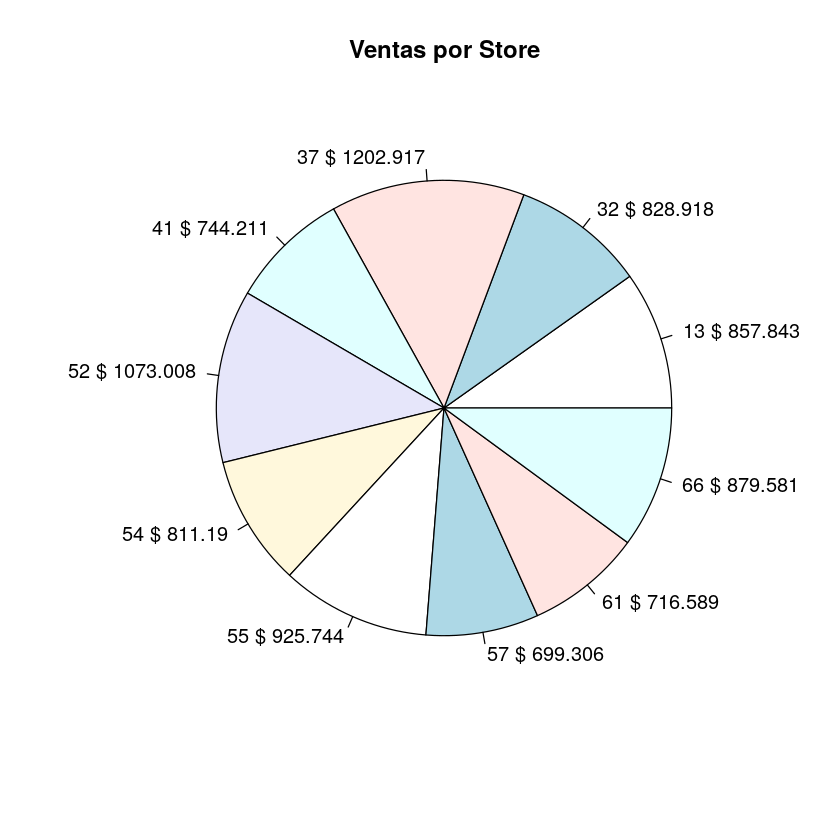

In [97]:
# Gráfico circular de las ventas por store
sales_by_store <- top_10_least_profitable %>%
    group_by(store) %>%
    summarise(total_sales = sum(Sales))

# Convertir el monto a miles
sales_by_store$total_sales <- sales_by_store$total_sales / 1000

pie(sales_by_store$total_sales, labels = paste(sales_by_store$store, "$", sales_by_store$total_sales), main = "Ventas por Store")


## 2. Evaluación de Las Variables

### 2.1 Evaluación de Variables Categóricas

Evaluo los valores de los datos categoricos según las variables

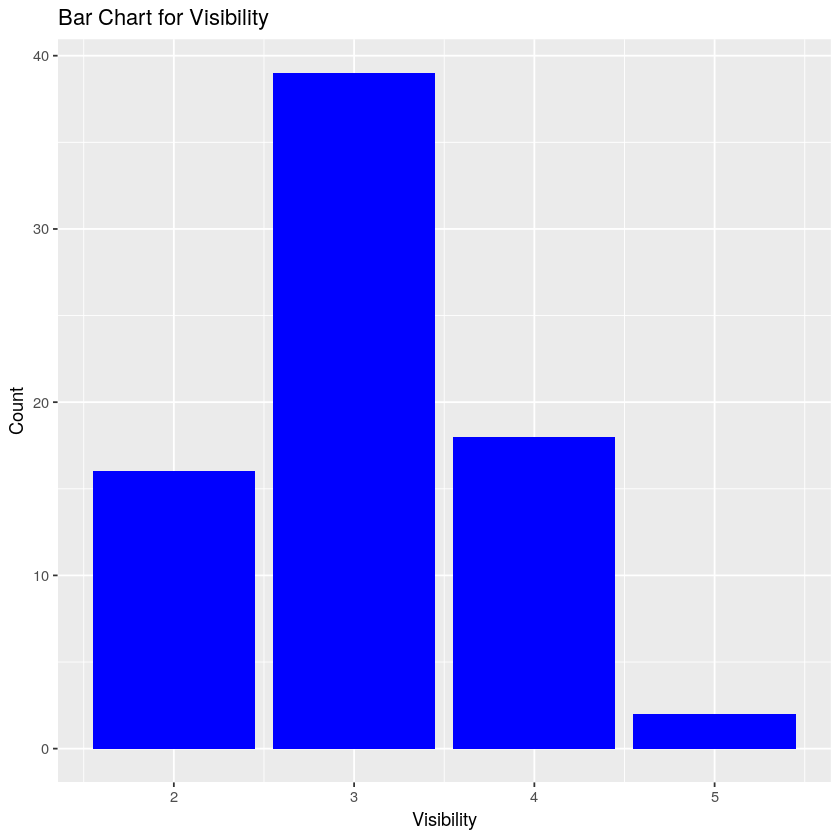

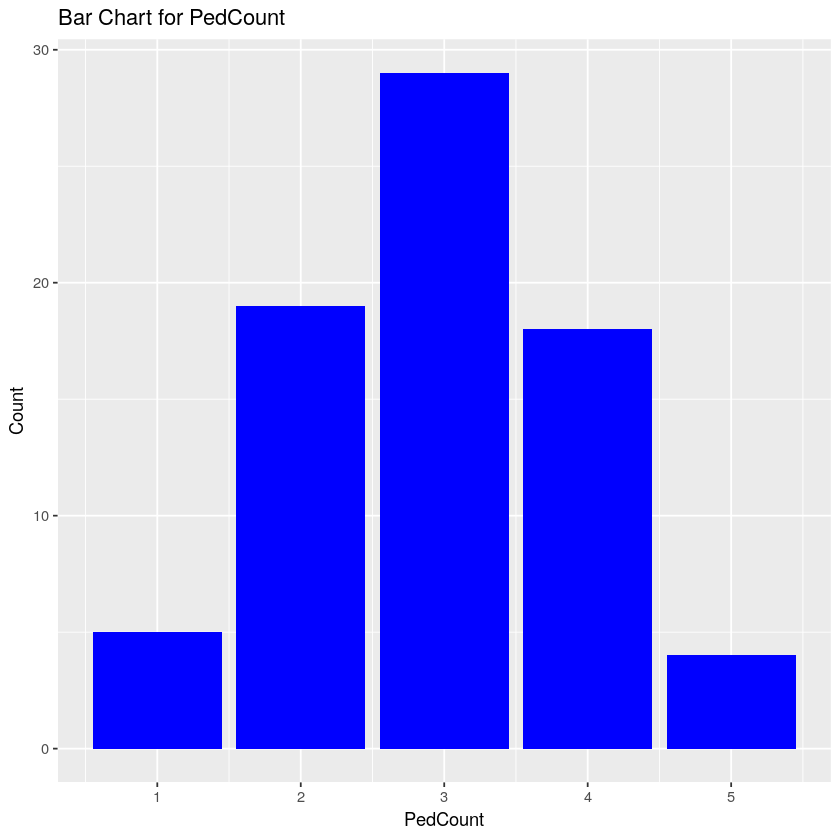

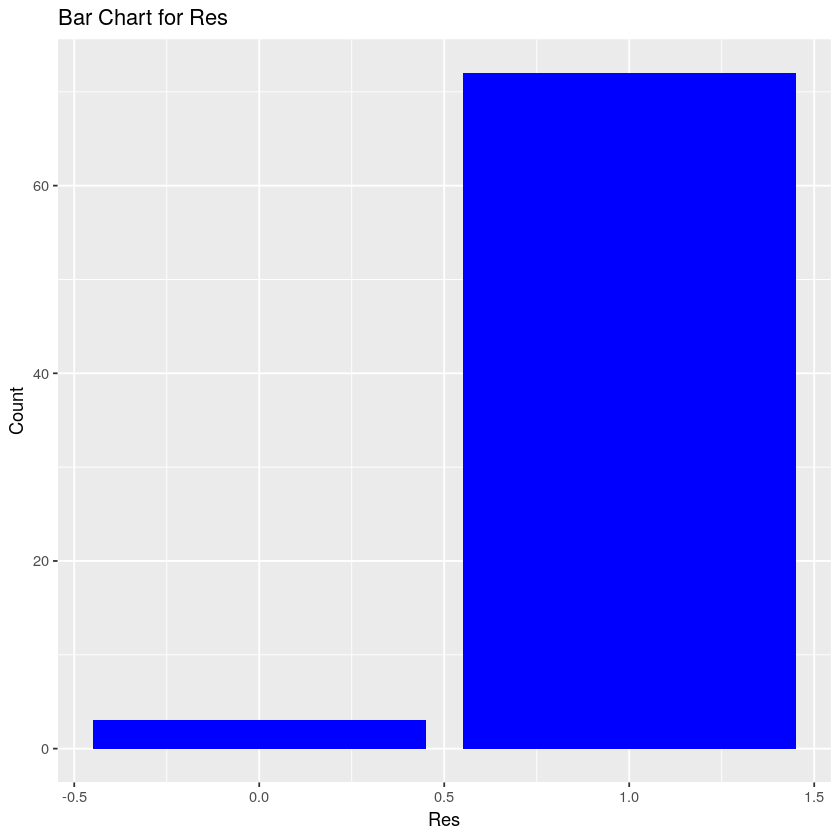

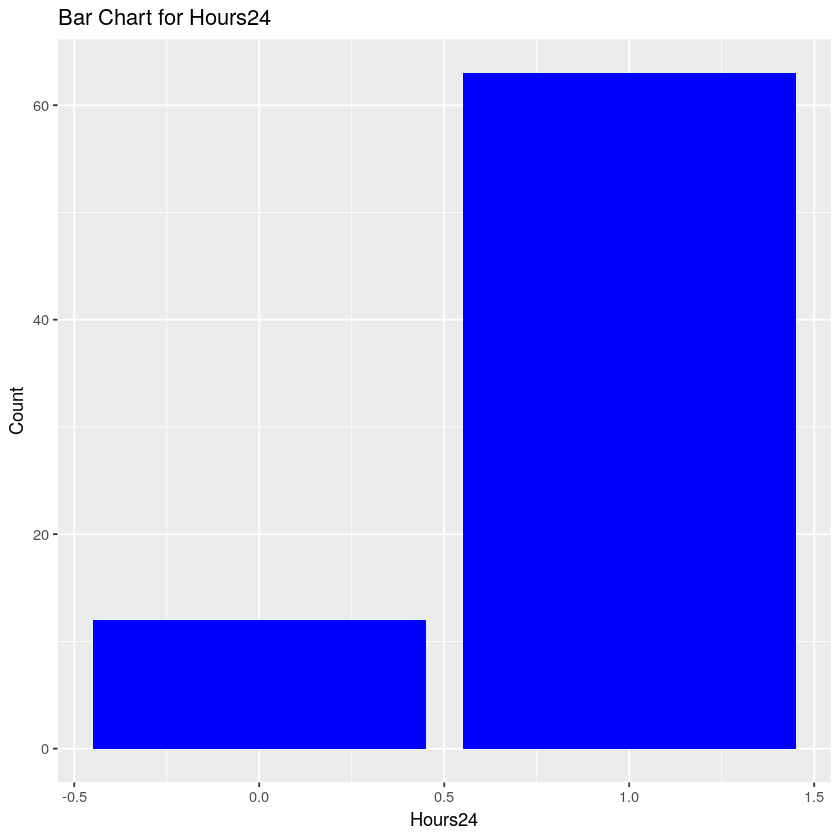

In [98]:
library(ggplot2)

# Crear un dataframe con las columnas Visibility, PedCount, Res, y Hours24
df <- data[, c("Visibility", "PedCount", "Res", "Hours24")]

# Función para crear gráficos de barras individuales
create_bar_plot <- function(variable_name) {
  ggplot(df, aes_string(x = variable_name)) +
    geom_bar(fill = "blue") +
    labs(title = paste("Bar Chart for", variable_name),
         x = variable_name,
         y = "Count")
}

# Crear y mostrar gráficos para cada columna
plot_list <- lapply(names(df), create_bar_plot)

# Mostrar los gráficos (en una sesión interactiva de RStudio, por ejemplo)
print(plot_list[[1]])
print(plot_list[[2]])
print(plot_list[[3]])
print(plot_list[[4]])


### 2.2 Visualización de la relación existe entre las variables

Procederé a realizar algunas visualizaciones con el fin de obtener una comprensión intuitiva de la relación
que pueda existir entre el beneficio (Profit) y algunas variables presentes en el conjunto de datos.

`geom_smooth()` using formula = 'y ~ x'


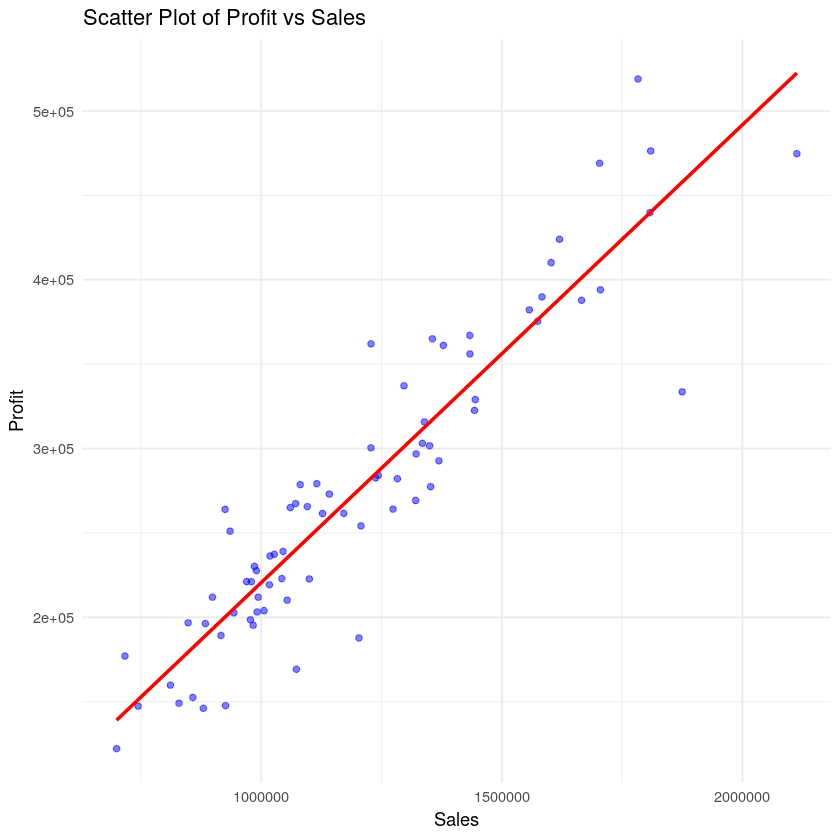

In [99]:
library(ggplot2)

# Definir la función para crear el gráfico de correlación
create_scatter_plot <- function(data, x, y) {
  ggplot(data, aes_string(x = x, y = y)) +
    geom_point(color = "blue", alpha = 0.5) +  # Puntos en el gráfico
    geom_smooth(method = "lm", color = "red", se = FALSE) +  # Línea de tendencia
    labs(title = paste("Scatter Plot of", y, "vs", x),
         x = x,
         y = y) +
    theme_minimal()  # Tema minimalista
}

# Usar la función para crear un gráfico de Profit vs Sales
create_scatter_plot(data, "Sales", "Profit")


`geom_smooth()` using formula = 'y ~ x'


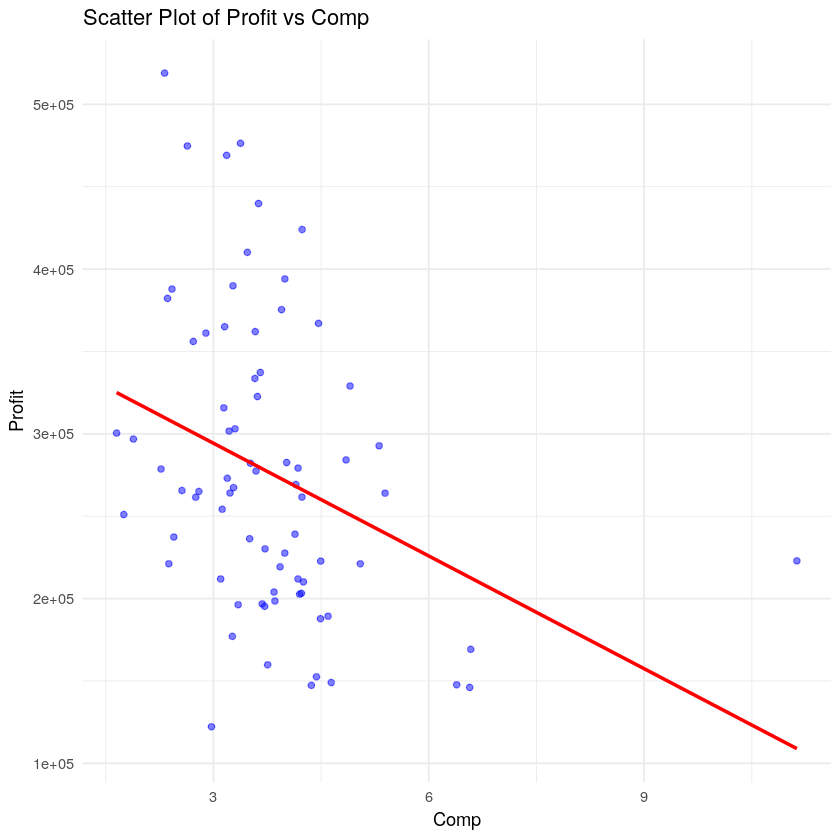

In [100]:
# Usar la función para crear un gráfico de Profit vs Sales
create_scatter_plot(data, "Comp", "Profit")

`geom_smooth()` using formula = 'y ~ x'


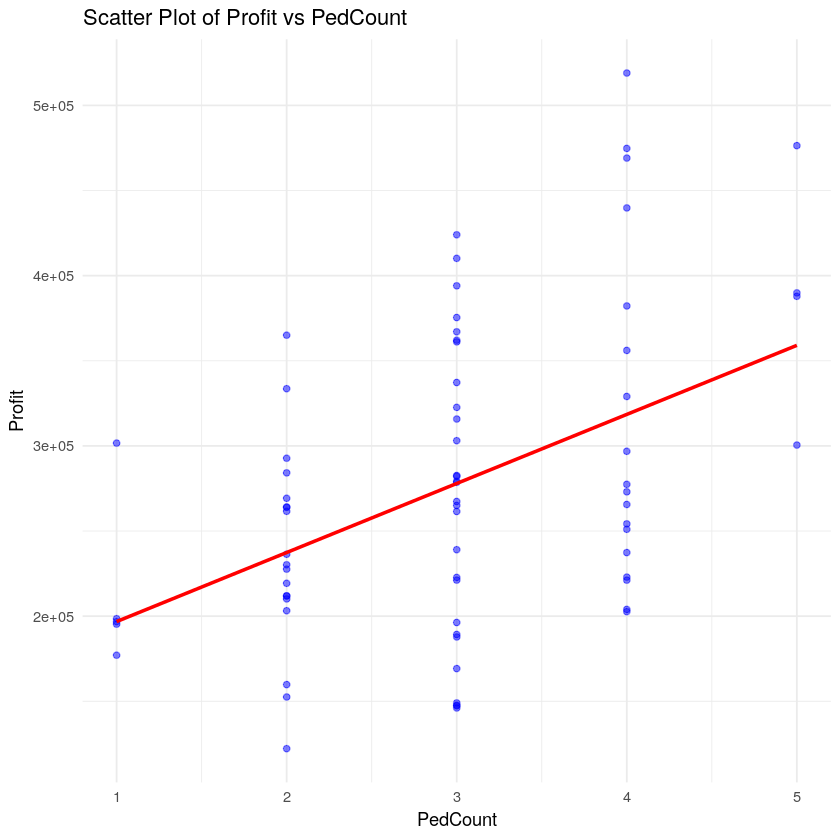

In [101]:
# Usar la función para crear un gráfico de Profit vs Sales
create_scatter_plot(data, "PedCount", "Profit")

`geom_smooth()` using formula = 'y ~ x'


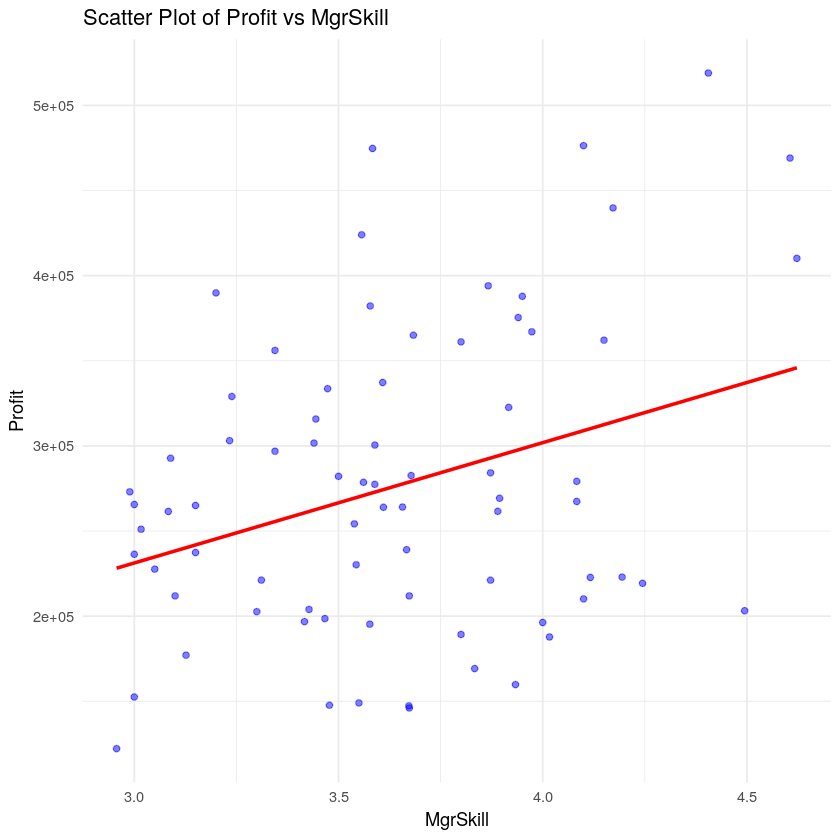

In [102]:
# Usar la función para crear un gráfico de Profit vs Sales
create_scatter_plot(data, "MgrSkill", "Profit")

`geom_smooth()` using formula = 'y ~ x'


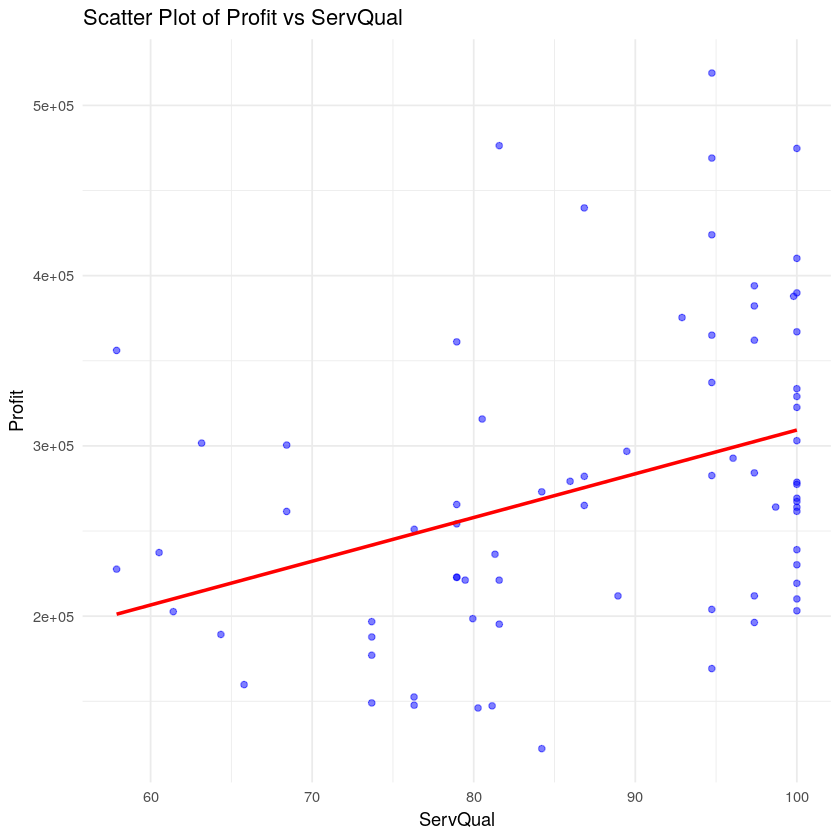

In [103]:
# Usar la función para crear un gráfico de Profit vs Sales
create_scatter_plot(data, "ServQual", "Profit")

### 2.3 Genero Diagrama de Cajas 

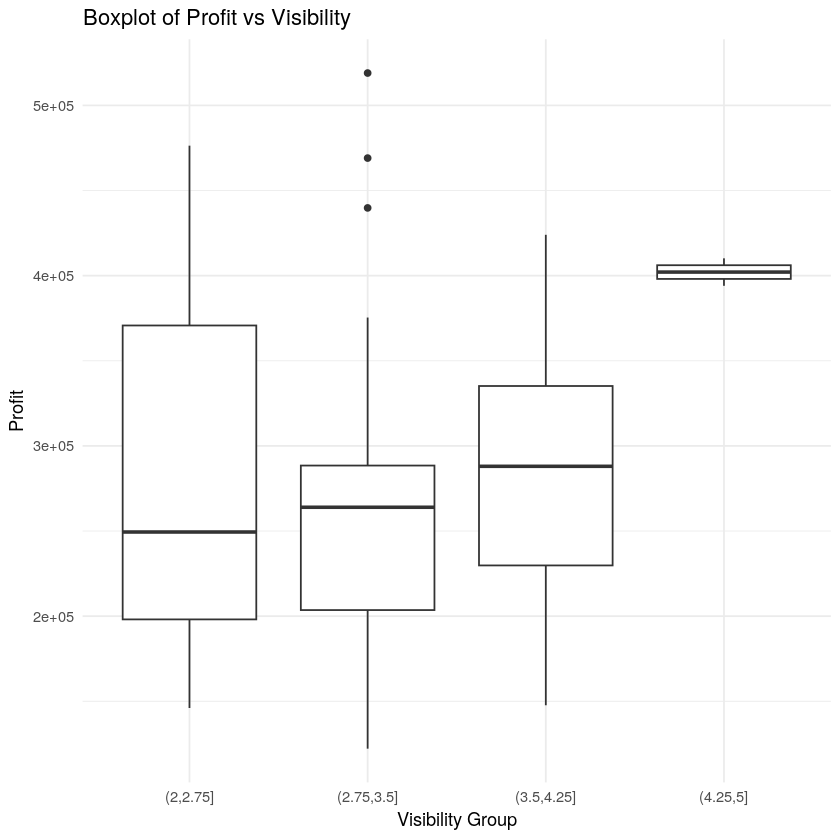

In [110]:
library(ggplot2)
library(dplyr)

# Definir la función para crear el boxplot
create_boxplot <- function(data, categorical_var, numeric_var, breaks = 4) {
  # Convertir la variable categórica basada en su rango de valores
  data <- data %>%
    mutate(!!categorical_var := cut(!!sym(categorical_var), breaks = breaks))

  # Crear el boxplot
  ggplot(data, aes_string(x = categorical_var, y = numeric_var)) +
    geom_boxplot() +
    labs(title = paste("Boxplot of", numeric_var, "vs", categorical_var),
         x = paste(categorical_var, "Group"),
         y = numeric_var) +
    theme_minimal()
}

create_boxplot(data, "Visibility", "Profit", breaks = 4)

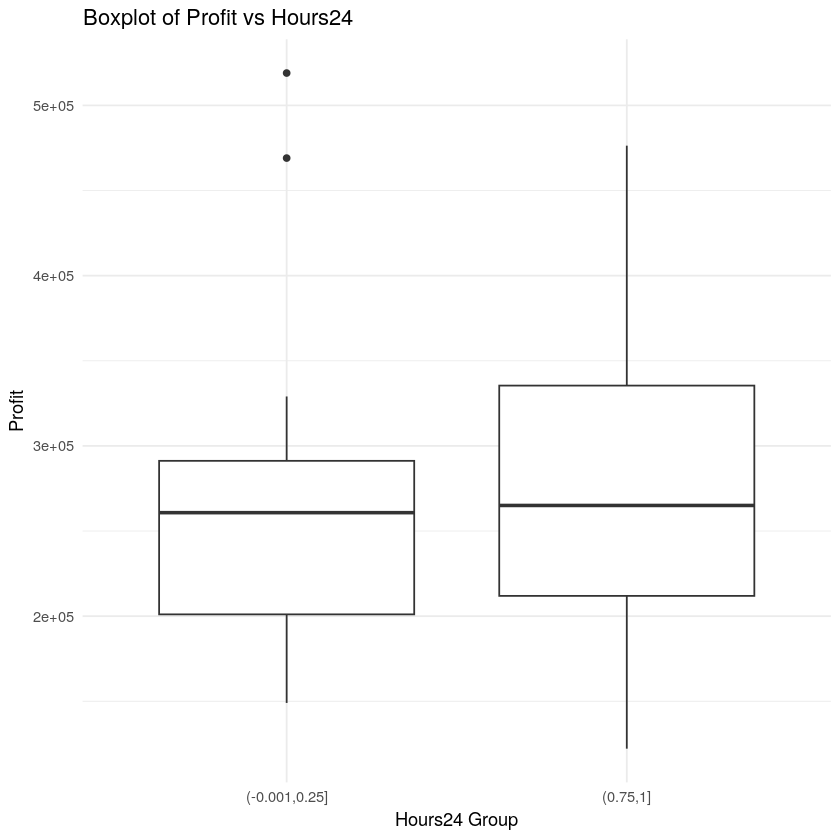

In [112]:
create_boxplot(data, "Hours24", "Profit", breaks = 4)

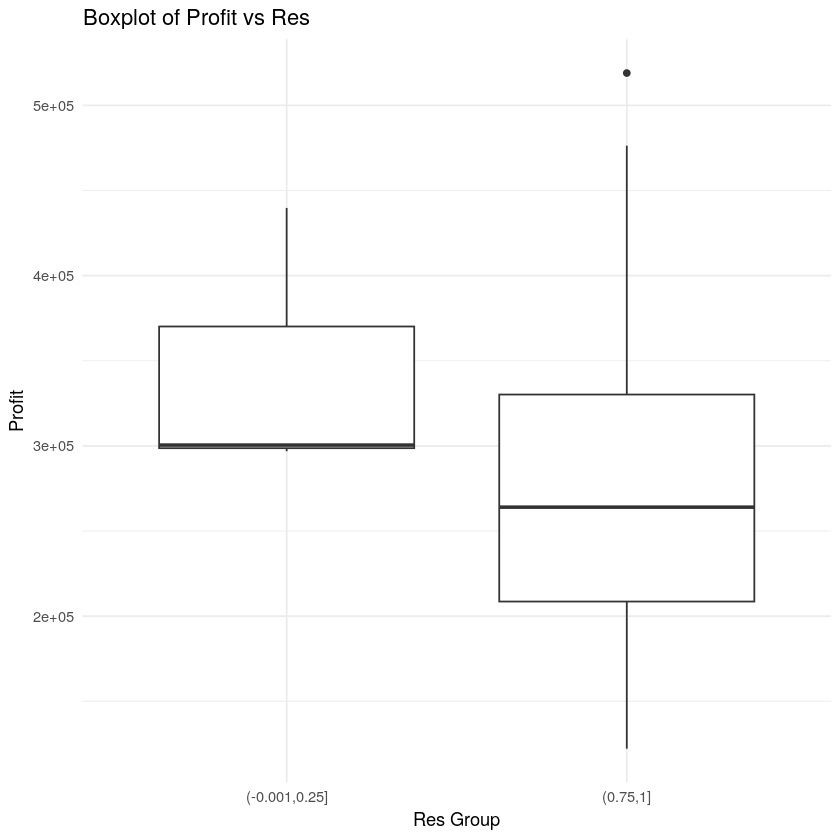

In [111]:
create_boxplot(data, "Res", "Profit", breaks = 4)

### 2.4 Generando mapa de Calor Variables Continuas

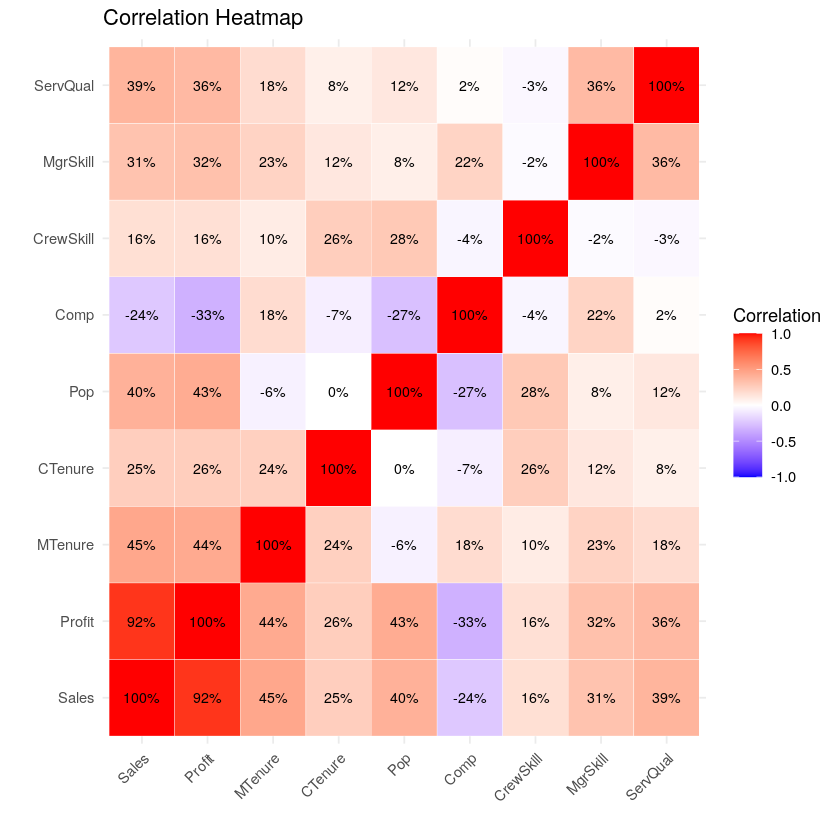

In [87]:
library(ggplot2)
library(reshape2)
library(dplyr)

# Seleccionar las columnas relevantes
selected_columns <- data %>%
  select(Sales, Profit, MTenure, CTenure, Pop, Comp, CrewSkill, MgrSkill, ServQual)

# Calcular la matriz de correlación
cor_matrix <- cor(selected_columns, use = "complete.obs")

# Convertir la matriz de correlación en un formato largo
melted_cor_matrix <- melt(cor_matrix)

# Crear el mapa de correlación
ggplot(data = melted_cor_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Correlation") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Heatmap",
       x = "",
       y = "") +
  geom_text(aes(label = scales::percent(value, accuracy = 1)), color = "black", size = 3)


## 3. Consultas Adicionales

### 3.1 ¿La antigüedad en el puesto de los gerentes y del personal impacta el desempeño operativo en las tiendas? 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


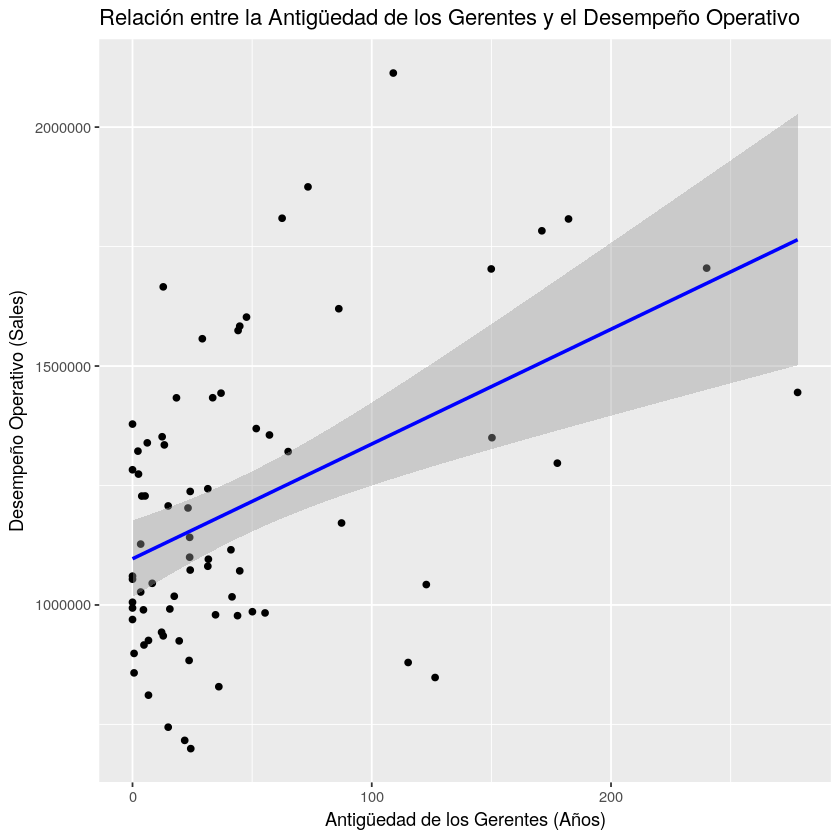

Correlación entre Antigüedad de los Gerentes y Desempeño Operativo (Sales): 0.4548802 
Correlación entre Antigüedad del Personal y Desempeño Operativo (Sales): 0.2543152 


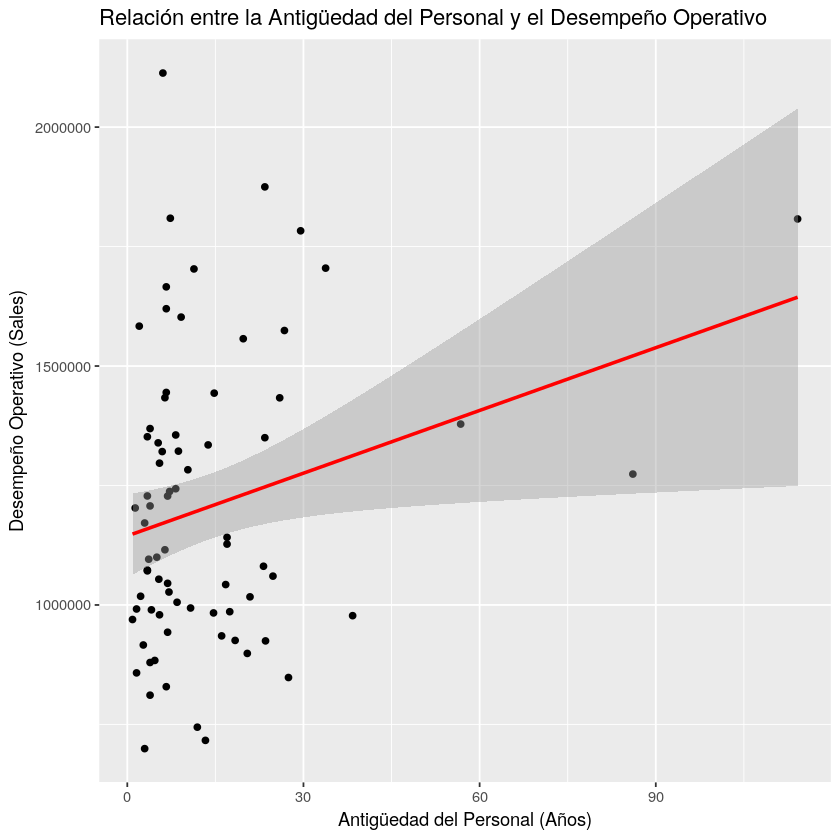

In [36]:
library(ggplot2)

# Gráfico de dispersión para MTenure vs. Sales
ggplot(data, aes(x = MTenure, y = Sales)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Relación entre la Antigüedad de los Gerentes y el Desempeño Operativo",
       x = "Antigüedad de los Gerentes (Años)",
       y = "Desempeño Operativo (Sales)")

# Gráfico de dispersión para CTenure vs. Sales
ggplot(data, aes(x = CTenure, y = Sales)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Relación entre la Antigüedad del Personal y el Desempeño Operativo",
       x = "Antigüedad del Personal (Años)",
       y = "Desempeño Operativo (Sales)")

# Calcular correlaciones
cor_mtenure_sales <- cor(data$MTenure, data$Sales, use = "complete.obs")
cor_ctenure_sales <- cor(data$CTenure, data$Sales, use = "complete.obs")

# Mostrar correlaciones
cat("Correlación entre Antigüedad de los Gerentes y Desempeño Operativo (Sales):", cor_mtenure_sales, "\n")
cat("Correlación entre Antigüedad del Personal y Desempeño Operativo (Sales):", cor_ctenure_sales, "\n")

### 3.2 ¿Cómo comparar la importancia de la antigüedad de los empleados vs. la importancia de los factores de ubicación de tiendas respeto al desempeño financiero de las tiendas?

Para comparar la importancia de la antigüedad de los empleados (CTenure y MTenure para el personal y los gerentes, respectivamente) versus la importancia de los factores de ubicación de las tiendas (por ejemplo, Visibility, PedCount para visibilidad y tráfico peatonal) respecto al desempeño financiero de las tiendas (por ejemplo, Sales o Profit), puedes realizar un análisis de correlación y visualizarlo mediante gráficos. Aquí te muestro cómo hacerlo paso a paso en R utilizando ggplot2 para los gráficos y cor para las correlaciones:

1. Calcular las correlaciones entre cada variable (antigüedad de los empleados y factores de ubicación) y el desempeño financiero.
2. Visualizar las correlaciones en un gráfico de barras para comparar su magnitud y dirección.

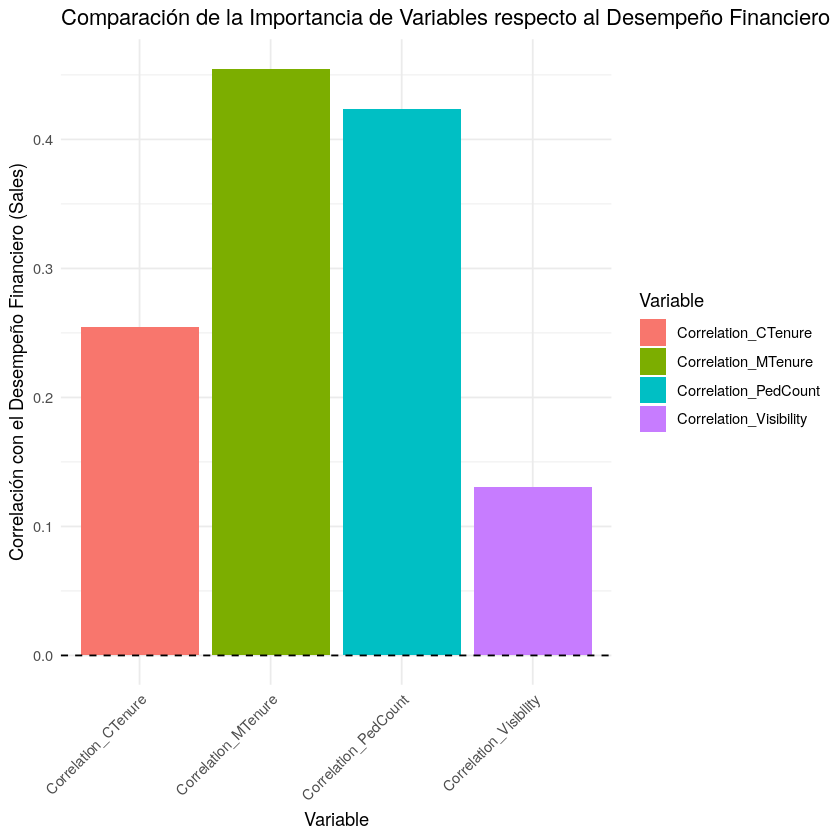

In [37]:
library(ggplot2)
library(dplyr)

# Calcular correlaciones
correlations <- data %>%
  summarise(
    Correlation_MTenure = cor(MTenure, Sales, use = "complete.obs"),
    Correlation_CTenure = cor(CTenure, Sales, use = "complete.obs"),
    Correlation_Visibility = cor(Visibility, Sales, use = "complete.obs"),
    Correlation_PedCount = cor(PedCount, Sales, use = "complete.obs")
  ) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Correlation")

# Gráfico de barras para visualizar las correlaciones
ggplot(correlations, aes(x = Variable, y = Correlation, fill = Variable)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Comparación de la Importancia de Variables respecto al Desempeño Financiero",
       x = "Variable",
       y = "Correlación con el Desempeño Financiero (Sales)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### 3.3 ¿La relación entre antigüedad en el puesto y el desempeño operativo cambia con la antigüedad?

Si el objetivo es simplemente explorar la relación entre la antigüedad en el puesto (MTenure) y el desempeño operativo (Sales o Profit) sin segmentar por antigüedad de la tienda, puedes omitir la segmentación y proceder con un análisis más general. Aquí te muestro cómo hacer un gráfico de dispersión con una línea de tendencia para estas dos variables:



`geom_smooth()` using formula = 'y ~ x'


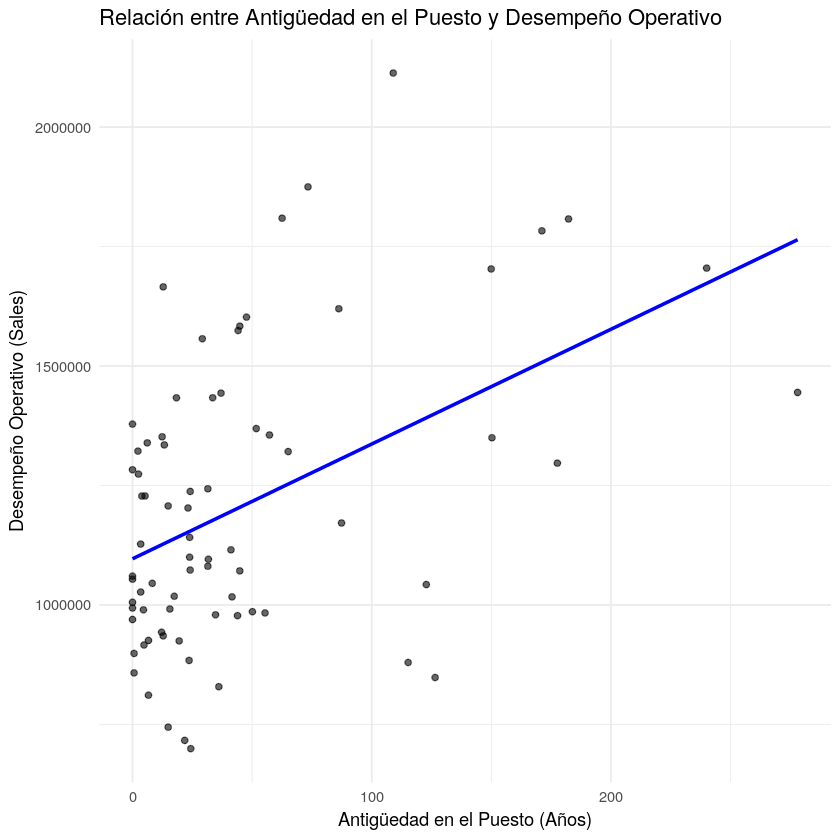

In [39]:
library(ggplot2)


# Gráfico de dispersión con línea de tendencia
ggplot(data, aes(x = MTenure, y = Sales)) +
  geom_point(alpha = 0.6) + # Puntos semi-transparentes para mejor visualización
  geom_smooth(method = "lm", se = FALSE, color = "blue") + # Línea de tendencia
  labs(title = "Relación entre Antigüedad en el Puesto y Desempeño Operativo",
       x = "Antigüedad en el Puesto (Años)",
       y = "Desempeño Operativo (Sales)") +
  theme_minimal()